In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'random_mas_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og = FigureLibrary(galfile, 'pk')
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

path = base + 'lowgr_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og.addResults(galfile)
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

path = base + 'CIC_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og.addResults(galfile)
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

Compare CICW, CIC, rCICW for hisubhalo auto (not applicable to the ptl distributions), galaxy, HIXgalaxy in real and redshift space for different colors

# hisubhalo Auto Power

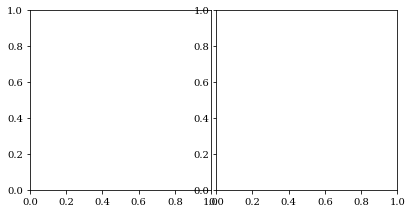

In [3]:
flib = copy.copy(flib_og)
flib.createFigGrid(1,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [4]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'hisubhalo'
ip['HI_res'] = 'diemer'
rmp['fieldname'] = 'galaxy'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'mas', rmp)
dim = flib.getDim()

In [5]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotFill(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':'brown', 'label':'Shuffled'})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':'orange', 'label':'CICW'})
        flib.plotFill(idx, {'mas':'CIC'},
                     fill_kwargs = {'color':'black', 'label':'CIC'})

In [6]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':10, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

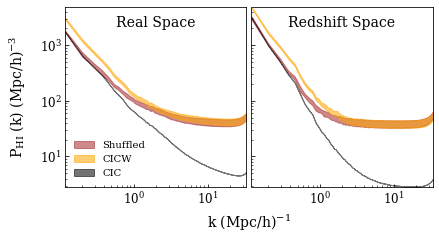

In [7]:
fig

## Analysis

Description:

Shows how the different MAS change the HI auto power spectrum (using the galaxy positions), for TNG100 at z = 0 using 800 grid resolution.

Questions:

- Why does shuffling the galaxies lower the power spectrum on large scales?

Consider two sides of the box, with side A having slightly higher average density than the side B. Side A will therefore have a more "evolved in redshift" system, where the cutoff mass in the N vs M relationship is moved to a higher mass. The number of low mass galaxies will stay relatively the same across the board but then side B will drop earlier than side A. So, in the shuffling, galaxies that would not have existed in side B are then shuffled in from side A, thereby lowering the power spectrum on large scales.

- Why does the shuffled case approach the normal case in the high-k limit?

Since we don't have any of the structure within halos, at this point the power is set by the shot noise. Thus shuffling the mass shouldn't change anything.

- Why does the CIC continue to drop while the CICW cases flatten off?

The density profiles drop off faster with r than satellite number densities

- Why does CIC not change between models?

Well the models determine the amount of HI in each halo, not where the halo is, so there's not gonna be any differences.

- Why does the shuffled case approach the CIC case in low-k limit?

In the first question, we discussed the fact that the only reason that the shuffled case had a drop in power was because there will be cases where halos with masses much too high for side B get shuffled in from side A, lowering the power on that amplitude. Thus, the only difference between side A and side B would be the number of galaxies on each side - thus approaching CIC on the largest limit.

In [8]:
fig.savefig("MAS_tests_hisubhalo_auto.pdf")

# Galaxy Auto Power

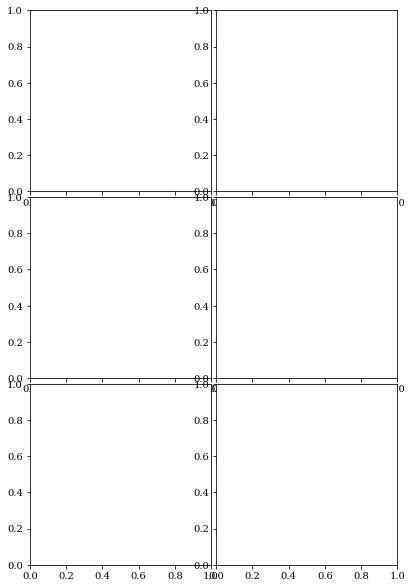

In [9]:
flib = copy.copy(flib_og)
flib.createFigGrid(3,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [10]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'galaxy'
ip['gal_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
rmp['fieldname'] = 'hisubhalo'
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'mas', rmp)
# dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['mas'])

In [11]:
colors = ['gray', 'blue', 'red']
# labels = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotLine(idx, {'mas':'rCICW'},
                     line_kwargs = {'color':colors[i], 'label':'Shuffled', 'linestyle':'--'})
        flib.plotLine(idx, {'mas':'CICW'},
                     line_kwargs = {'color':colors[i], 'label':'CICW'})
        flib.plotLine(idx, {'mas':'CIC'},
                     line_kwargs = {'color':colors[i], 'label':'CIC', 'linestyle':':'})

In [12]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{gal}', txt_kwargs = axiskw)

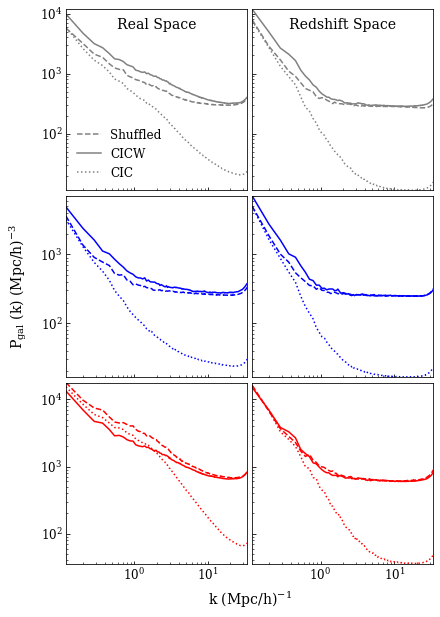

In [13]:
fig

## Analysis

Description: Galaxy auto power spectra with different MAS for TNG100, grid 800, z=0

Questions:

- Why do the red galaxies have increased power in the 1-halo term in the shuffled case?

When shuffling the galaxies, within a cluster there will be one massive red central and several red satellites. Shuffling increases the chance that a massive central gets shuffled into the halo, particularly for red galaxies since the meaning that there are now two massive centrals whereas in the unshuffled case you could not possibly have these two galaxies sharing a halo together.

- Why do the red galaxies have increased power in the 2-halo term as well then?

Super useful resource here (plot pulled from Berlind & Weinberg 2002): http://www.astro.yale.edu/vdbosch/astro610_lecture13.pdf

In those lecture notes, it talks about why and how the power spectrum would be sensitive to the satellite fraction of galaxies on *all* scales, which is applicable here. The 2-halo term *is* sensitive to the satellite fraction through the halo bias; halos with more mass tend to be more strongly biased *and* have a higher number of satellites. Thus, when you shuffle the galaxies, and the same situation as described above occurs, you artificially increase the halo bias because those halos now have even more mass.

Even better, slide 19 states that what occurs here is expected when computing power spectra from populations with different satellite fractions!

- Why does the CIC case also have a higher amplitude on the largest scales, then fall at the smallest ones?

In the CICW case, the effect of the satellite fraction on the largest scales (i.e. through the halo bias) is down-weighted due to the satellites having smaller masses than their centrals. However, the effect on smaller scales is through the radial number density profile's dependence on radius 
- Why doesn't red galaxies' shuffled case approach CIC like the others do?

Again, due to the relationship with the halo bias - the red population does not sample the more isolated halos but rather over-samples the already biased high-mass halos. 

In [14]:
fig.savefig('mas_test_galaxy_auto.pdf')

# Galaxy Auto MAS color comparison

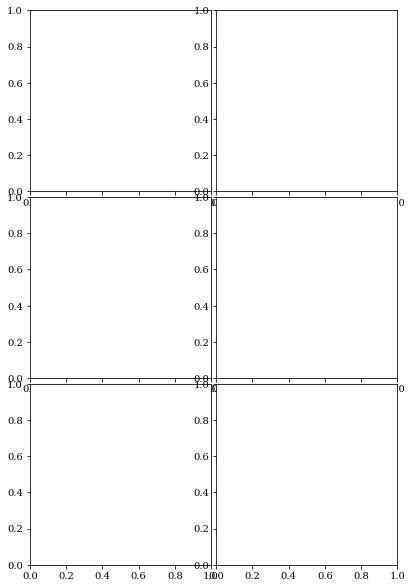

In [15]:
flib = copy.copy(flib_og)
flib.createFigGrid(3,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [16]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'galaxy'
ip['gal_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
rmp['fieldname'] = 'hisubhalo'
figarr = flib.arrangeResults(ip, 'mas', ['CIC', 'CICW', 'rCICW'], 'space', ['real', 'redshift'], 'color', rmp)
# dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['mas'])

In [17]:
# labels = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotLine(idx, {'color':'red'},
                     line_kwargs = {'color':'red', 'label':'Red'})
        flib.plotLine(idx, {'color':'blue'},
                     line_kwargs = {'color':'blue', 'label':'Blue'})
        flib.plotLine(idx, {'color':'resolved'},
                     line_kwargs = {'color':'grey', 'label':'All'})


In [18]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
rowkw = {'fontsize':12, 'ha':'left', 'va':'bottom'}
legkw = {'fontsize':12, 'loc':'upper right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.rowLabels(['CIC', 'CICW', 'Shuffled'], txt_kwargs = rowkw)
flib.addLegend((1,0), kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{gal}', txt_kwargs = axiskw)

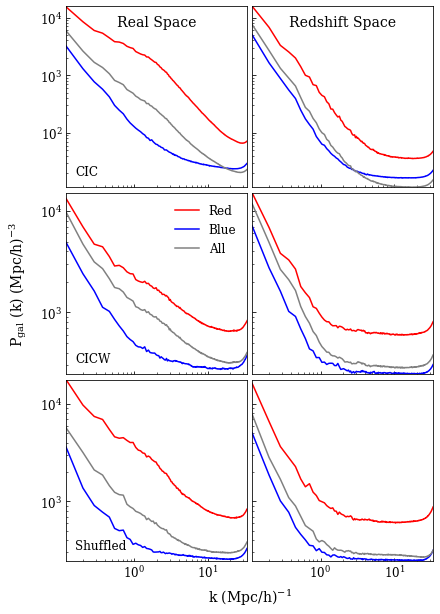

In [19]:
fig

Analysis

# HIXgalaxy MAS Analysis

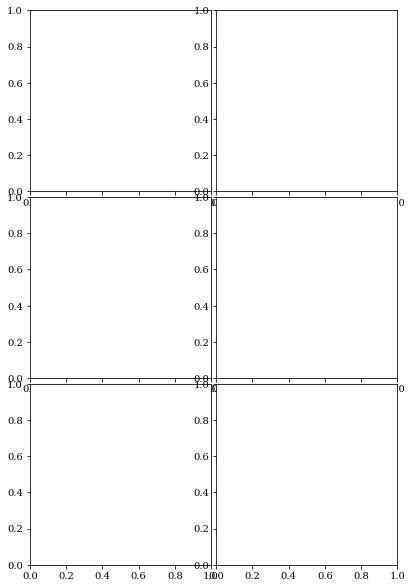

In [25]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 2, panel_length = 2.5)
fig, panels = flib.getFig()

In [26]:
ip = {}; rmp = {}
ip['is_auto'] = False
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'mas', rmp)
# dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['model'], r.props['mas'], r.props['color'])

In [27]:
rcicw_color = 'brown'
cic_color = 'black'
cicw_colors = ['gray', 'blue', 'red']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotFill(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':rcicw_color, 'label':'Shuffled', 'alpha':0.3})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':cicw_colors[i], 'label':'CICW'})
        flib.plotFill(idx, {'mas':'CIC'},
                     fill_kwargs = {'color':cic_color, 'label':'CIC'})

In [28]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'lower left'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI-gal}', txt_kwargs = axiskw)

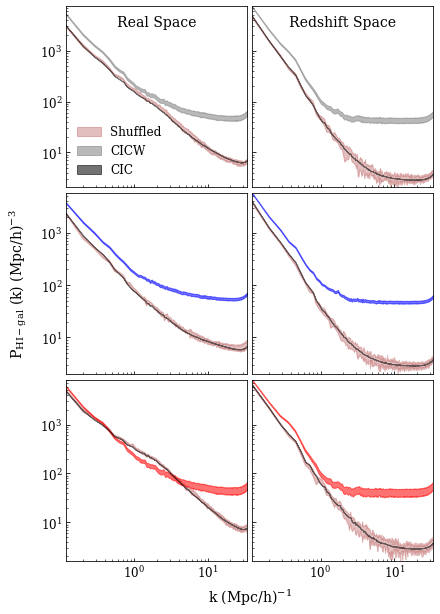

In [29]:
fig